In [40]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt

def euler(gamma,t,a,b):
    dt = t[2] - t[1]; #stepsize
    y1 = np.arange(0,100,dt); #Position
    y2 = np.arange(0,100,dt); #Velocity
    y1[0] = a; #initial conditions
    y2[0] = b;
    for i in range(np.size(t)-1):
        y1[i+1] = y1[i] + dt*1*y2[i];
        y2[i+1] = y2[i] + (-gamma*y2[i]-1*y1[i])*dt;
    return y2, y1

def reference(gamma,t):
    #y1 = np.exp(-gamma/2+cm.sqrt((gamma^2)/4-1))*t+0*np.exp(-gamma/2-cm.sqrt((gamma^2)/4-1))*t;
    #y2 = (-gamma/2+cm.sqrt((gamma^2)/4-1))*np.exp(-gamma/2+cm.sqrt((gamma^2)/4-1))*t+0*(-gamma/2-cm.sqrt((gamma^2)/4-1))*np.exp(-gamma/2-cm.sqrt((gamma^2)/4-1))*t;
    #y1 = 1/(2*cm.sqrt(gamma^2-4))*np.exp(-0.5*(cm.sqrt(gamma^2-4)+gamma)*t)*((gamma*np.exp(cm.sqrt(gamma^2-4)*t))+cm.sqrt(gamma^2-4)*(np.exp(cm.sqrt(gamma^2-4)*t)+1))-gamma*np.exp(0.5*(-cm.sqrt(gamma^2-4)-gamma)*t)
    #y2 = 1/cm.sqrt(gamma^2-4)*np.exp(0.5*(-cm.sqrt(gamma^2-4)-gamma)*t)-np.exp(0.5*(cm.sqrt(gamma^2-4)-gamma)*t)
    match gamma:
        case 0:
            y1 = np.cos(t);
            y2 = -np.sin(t);
        case 1:
            y1 = 1/3*np.exp(-t/2)*(np.sqrt(3)*np.sin(np.sqrt(3)/2*t)+3*np.cos(np.sqrt(3)/2*t));
            y2 = -2/np.sqrt(3)*np.exp(-t/2)*np.sin(np.sqrt(3)/2*t);
        case 2:
            y1 = np.exp(-t)*(t+1);
            y2 = -np.exp(-t)*t;
        case 4:
            y1 = 1/6*np.exp(-(2+np.sqrt(3))*t)*(((3+2*np.sqrt(3))*np.exp(2*np.sqrt(3)*t))+3-2*np.sqrt(3));
            y2 = -(np.exp(-(2+np.sqrt(3))*t)*(np.exp((2*np.sqrt(3))*t)-1))/(2*np.sqrt(3));
    return y2, y1

def get_error(err,dt):
    E = 0;
    for i in range(np.size(err)):
        E += (err[i]**2)*dt;
    return np.sqrt(E)

px = 1/plt.rcParams['figure.dpi'] #Define pixel for plotting later
dt = np.array([0.5,0.1,0.05,0.01,0.005,0.001]); #stepsize
gamma = np.array([0,1,2,4]); #Damping constant in the 4 main regimes
E1 = np.zeros([np.size(dt),np.size(gamma)]);
E2 = np.zeros([np.size(dt),np.size(gamma)]);

#Stepsize is varied
for k in range(np.size(dt)):
    t = np.arange(0,100,dt[k]); #Time
    #Damping constant is varied
    for j in range(np.size(gamma)):
        y2,y1 = euler(gamma[j],t,1,0); #Euler method
        y2ref,y1ref = reference(gamma[j],t);
        err1 = y1-y1ref;
        err2 = y2-y2ref;
        E1[k][j] = get_error(err1,dt[k]); #Each column is a different gamma, each column contains all dts.
        E2[k][j] = get_error(err2,dt[k]);
        '''
        # Plotting
        fig, ax = plt.subplots(1,2,figsize=(1920*px, 1080*px))
        ax[0].plot(t,np.real(y1ref),label='Position Reference'),ax[0].set_title('$\Delta$t = ' + str(dt[k]) + ' and ' + '$\gamma$ = ' + str(gamma[j]));
        #ax[0].plot(t,np.real(y2ref),label='Velocity Reference')
        ax[0].grid(True),ax[0].set_xlabel('Time in s')
        ax[0].plot(t,np.real(y1),label='Position Euler')
        #ax[0].plot(t,np.real(y2),label='Velocity Euler')
        ax[0].legend(),ax[0].set_ylim(-1,1);
        ax[1].semilogy(t,np.real(err1),label='Position error',color='k')
        ax[1].set_title('Error of $\Delta$t = ' + str(dt[k]) + ' and ' + '$\gamma$ = ' + str(gamma[j]));
        #ax[1].semilogy(t,np.real(err2),label='Velocity error')
        ax[1].grid(True),ax[1].legend(),ax[1].set_xlabel('Time in s')
        #plt.close();
        '''

([<matplotlib.lines.Line2D at 0x19dbd02a050>],
 Text(0.5, 0, '1/dt'),
 Text(0, 0.5, 'L2-norm error'),
 Text(0.5, 1.0, 'Overdamped case'),
 None,
 <matplotlib.legend.Legend at 0x19dbcfd8220>)

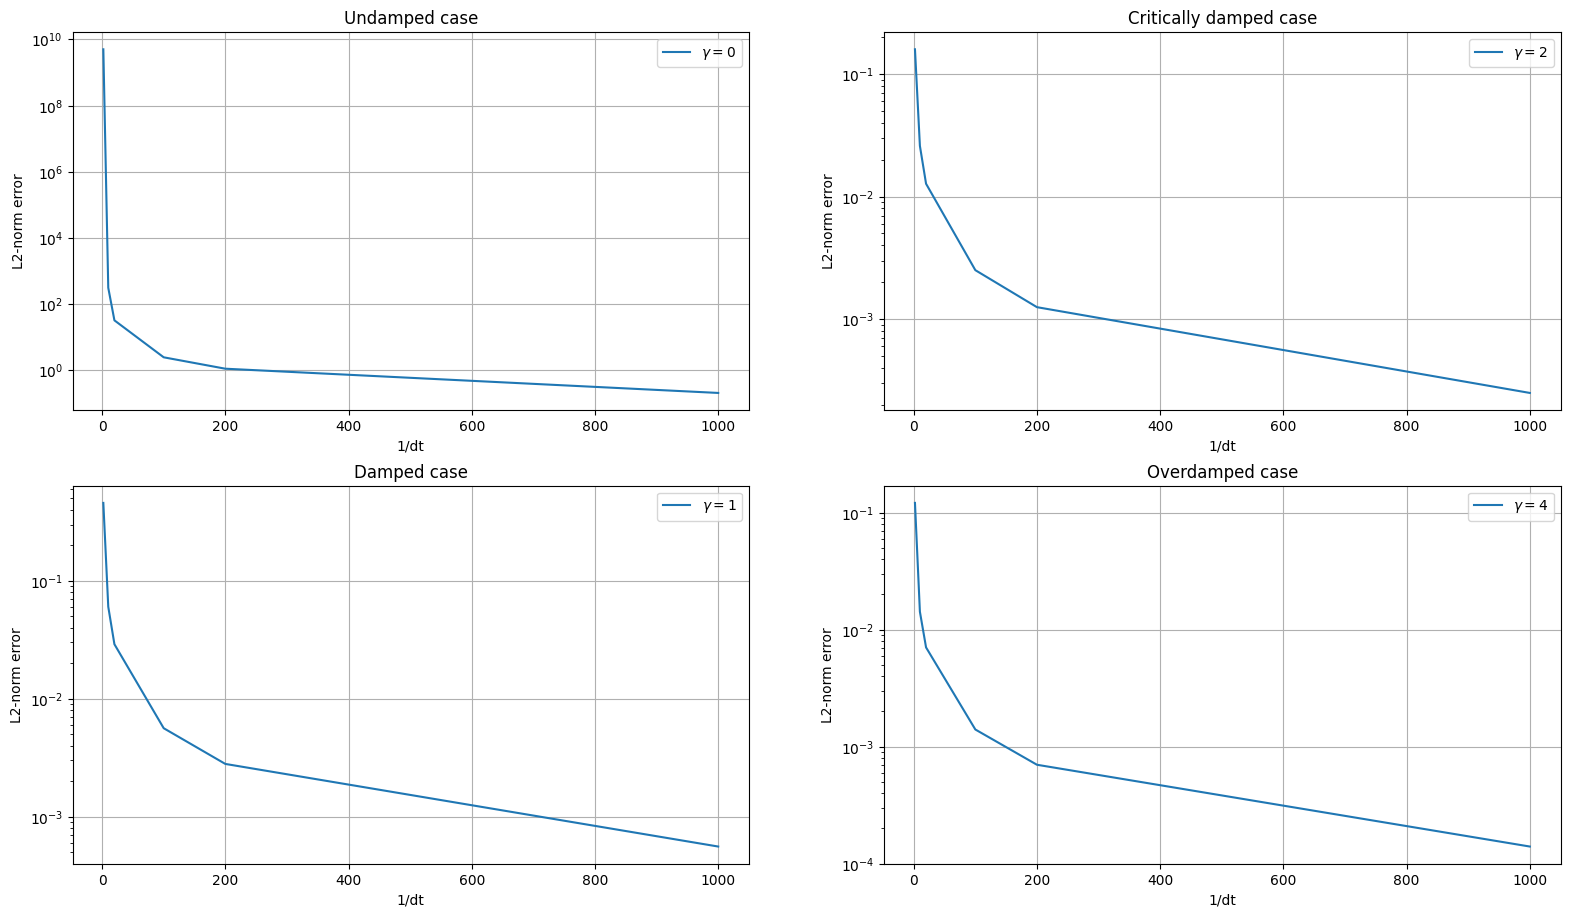

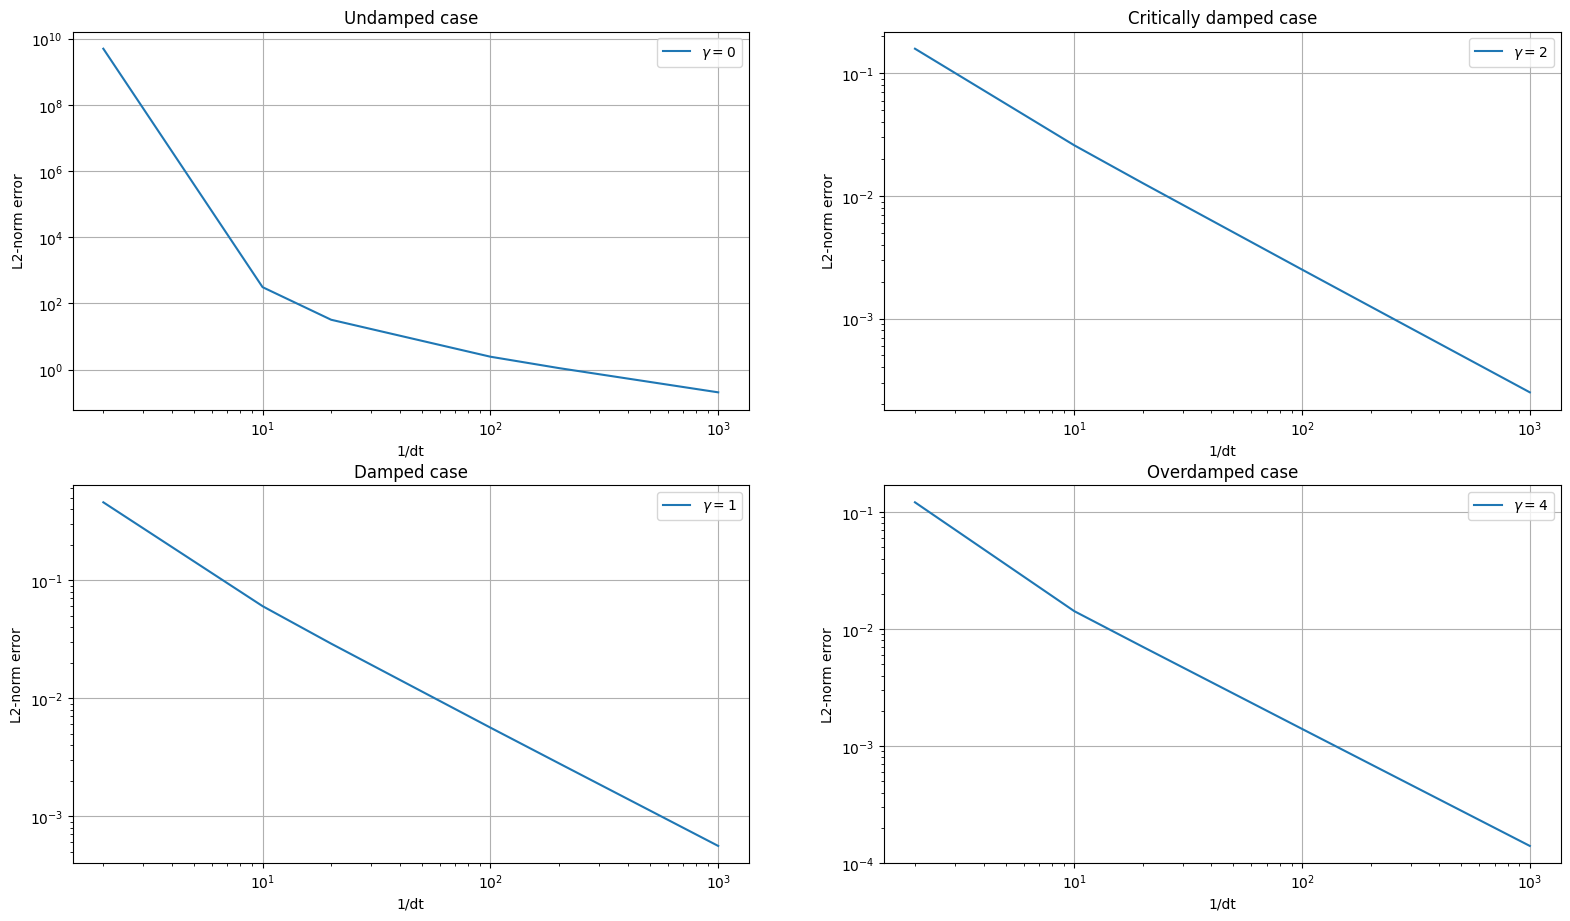

In [41]:
fig3, ax = plt.subplots(2,2,figsize=(1920*px, 1080*px))
ax[0,0].semilogy(1/dt,E1[:,0],label='$\gamma = $'+str(gamma[0])),ax[0,0].set_xlabel('1/dt'),ax[0,0].set_ylabel('L2-norm error'),ax[0,0].set_title('Undamped case'),ax[0,0].grid(),ax[0,0].legend()
ax[1,0].semilogy(1/dt,E1[:,1],label='$\gamma = $'+str(gamma[1])),ax[1,0].set_xlabel('1/dt'),ax[1,0].set_ylabel('L2-norm error'),ax[1,0].set_title('Damped case'),ax[1,0].grid(),ax[1,0].legend()
ax[0,1].semilogy(1/dt,E1[:,2],label='$\gamma = $'+str(gamma[2])),ax[0,1].set_xlabel('1/dt'),ax[0,1].set_ylabel('L2-norm error'),ax[0,1].set_title('Critically damped case'),ax[0,1].grid(),ax[0,1].legend()
ax[1,1].semilogy(1/dt,E1[:,3],label='$\gamma = $'+str(gamma[3])),ax[1,1].set_xlabel('1/dt'),ax[1,1].set_ylabel('L2-norm error'),ax[1,1].set_title('Overdamped case'),ax[1,1].grid(),ax[1,1].legend()

fig4, ax = plt.subplots(2,2,figsize=(1920*px, 1080*px))
ax[0,0].loglog(1/dt,E1[:,0],label='$\gamma = $'+str(gamma[0])),ax[0,0].set_xlabel('1/dt'),ax[0,0].set_ylabel('L2-norm error'),ax[0,0].set_title('Undamped case'),ax[0,0].grid(),ax[0,0].legend()
ax[1,0].loglog(1/dt,E1[:,1],label='$\gamma = $'+str(gamma[1])),ax[1,0].set_xlabel('1/dt'),ax[1,0].set_ylabel('L2-norm error'),ax[1,0].set_title('Damped case'),ax[1,0].grid(),ax[1,0].legend()
ax[0,1].loglog(1/dt,E1[:,2],label='$\gamma = $'+str(gamma[2])),ax[0,1].set_xlabel('1/dt'),ax[0,1].set_ylabel('L2-norm error'),ax[0,1].set_title('Critically damped case'),ax[0,1].grid(),ax[0,1].legend()
ax[1,1].loglog(1/dt,E1[:,3],label='$\gamma = $'+str(gamma[3])),ax[1,1].set_xlabel('1/dt'),ax[1,1].set_ylabel('L2-norm error'),ax[1,1].set_title('Overdamped case'),ax[1,1].grid(),ax[1,1].legend()